In [15]:
import os       
import cv2       
import numpy as np  
import glob      
from PIL import Image  
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

In [16]:
def preprocess_data(data_dir, img_size=(128,128)): #data_dir dan toi thu muc goc
    images = []
    labels = []
    categories = ['real','fake']

    for category in categories:
        path = os.path.join(data_dir, category)
        label = 0 if category == 'real' else 1

        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                img = Image.open(img_path).convert('RGB')  
                img = img.resize(img_size)               
                img = np.array(img) / 255.0                                  
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Can't read: {img_path} - {e}")
    
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

X, y = preprocess_data(r'train', img_size=(128, 128))



In [17]:
print("so anh real:",len(os.listdir(r'train\real')))
print("so anh fake:",len(os.listdir(r'train\fake')))


so anh real: 5605
so anh fake: 6028


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
print(f"train: {X_train.shape[0]}")
print(f"test: {X_test.shape[0]}")

train: 9306
test: 2327


In [20]:
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    optimizer = SGD(learning_rate=0.01, momentum=0.9)  
    model.compile(optimizer=optimizer, 
                loss='binary_crossentropy', 
                metrics=['accuracy'])
    return model

model = create_cnn_model(X_train.shape[1:])
model.summary()


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 50s 164ms/step - accuracy: 0.5451 - loss: 0.6900 - val_accuracy: 0.5492 - val_loss: 0.6846
Epoch 2/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 46s 157ms/step - accuracy: 0.5682 - loss: 0.6782 - val_accuracy: 0.6803 - val_loss: 0.6374
Epoch 3/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 45s 154ms/step - accuracy: 0.6683 - loss: 0.6160 - val_accuracy: 0.6893 - val_loss: 0.5780
Epoch 4/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 44s 153ms/step - accuracy: 0.7170 - loss: 0.5484 - val_accuracy: 0.7761 - val_loss: 0.4745
Epoch 5/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 44s 152ms/step - accuracy: 0.7800 - loss: 0.4605 - val_accuracy: 0.7800 - val_loss: 0.4596
Epoch 6/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 49s 170ms/step - accuracy: 0.8137 - loss: 0.4077 - val_accuracy: 0.8195 - val_loss: 0.3950
Epoch 7/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 49s 168ms/step - accuracy: 0.8412 - loss: 0.3536 - val_accuracy: 0.8608 - val_loss: 0.3319
Epoch 8/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 49s 167ms/step - accuracy: 0.8728 - loss: 0

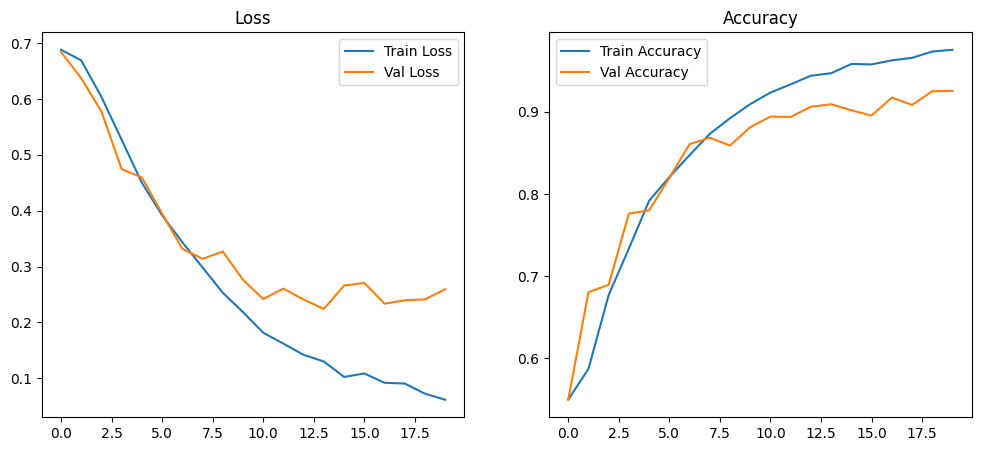

In [22]:
plt.figure(figsize=(12,5 ))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


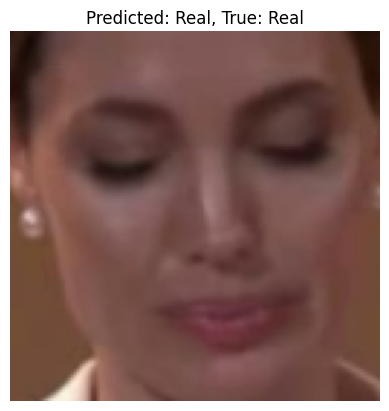

Predicted probability: 0.0015


In [25]:
rand_idx = np.random.randint(0, len(X_test))
x_sample = X_test[rand_idx]
y_true = y_test[rand_idx]

x_input = np.expand_dims(x_sample, axis=0)  # (1, 128, 128, 3) -> batch 1 img
pred = model.predict(x_input)

pred_label = 1 if pred[0][0] >= 0.5 else 0

plt.imshow(x_sample)
plt.axis('off')
plt.title(f"Predicted: {'Fake' if pred_label == 1 else 'Real'}, True: {'Fake' if y_true == 1 else 'Real'}")
plt.show()

print(f"Predicted probability: {pred[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


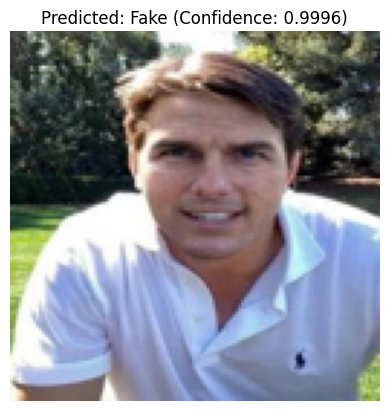

('Fake', np.float32(0.9996335))

In [24]:
def pred_new(model, image_path, img_size=(128, 128)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(img_size)

    #normalizenormalize
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension (1,128,128,3)

    # predictpredict
    pred = model.predict(img_array)
    pred_label = 'Fake' if pred[0][0] >= 0.5 else 'Real'

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {pred_label} (Confidence: {pred[0][0]:.4f})")
    plt.show()

    return pred_label, pred[0][0]

pred_new(model, r'phake.jpg')